In [1]:
from bokeh.layouts import layout
from bokeh.io import curdoc,show
from bokeh.plotting import figure, show, output_file,output_notebook
from bokeh.models import CustomJS, RangeSlider

output_file("graphbokeh.html")
#rgb(21, 25, 28)
curdoc().theme = "dark_minimal"

# prepare some data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50]
y = [4, 5, 5, 7, 2, 6, 4, 9, 1, 3, 8]
output_notebook()
# create a new plot with a title and axis labels
p = figure(x_range=(min(x), max(x)),title="Graph", x_axis_label="x", y_axis_label="y",sizing_mode="stretch_width",
    plot_height=500,)

# add multiple renderers
p.vbar(x=x, top=y, legend_label="Cts", width=0.5, bottom=0, color="pink")
p.toolbar.autohide = True

# set up RangeSlider
range_slider = RangeSlider(
    title="Adjust x-axis range",
    start=min(x),
    end=max(x),
    step=1,
    value=(p.x_range.start, p.x_range.end),
)
range_slider.js_link("value", p.x_range, "start", attr_selector=0)
range_slider.js_link("value", p.x_range, "end", attr_selector=1)

# create layout
layout = layout(
    [[range_slider],
        [p],
    ]
)

# show result
show(layout)

Loading BokehJS ...

In [6]:
  
from bokeh.plotting import figure, output_file, show

output_file("varea.html")

p = figure(plot_width=400, plot_height=400)

p.varea(x=[1, 2, 3, 4, 5],
        y1=[2, 6, 4, 3, 5],
        y2=[1, 4, 2, 2, 3])

show(p)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

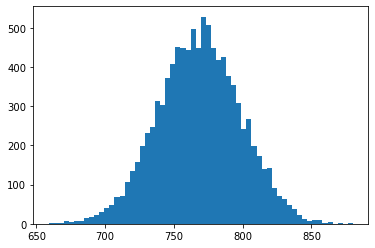

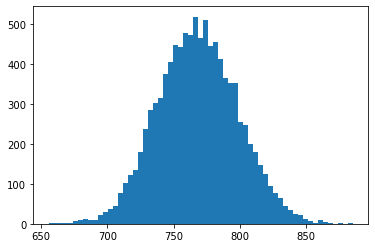

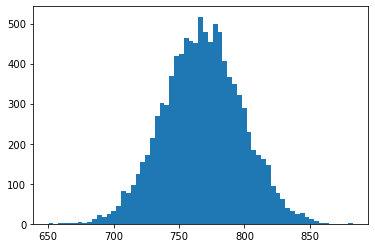

KeyboardInterrupt: 

In [2]:
mu, sigma = 768, 30
while True:
    measured = np.random.normal(mu, sigma, 10000)
    plt.hist(measured,bins='auto')
    plt.draw()
    plt.pause(5)

(array([  2.,   0.,   2.,   3.,   2.,   6.,   9.,  16.,  20.,  25.,  21.,
         50.,  72.,  61.,  82., 122., 120., 159., 212., 221., 272., 303.,
        341., 400., 405., 455., 494., 460., 502., 492., 496., 441., 467.,
        419., 404., 407., 334., 306., 275., 235., 170., 140., 124., 117.,
         89.,  75.,  47.,  29.,  33.,  18.,  17.,  13.,   5.,   0.,   6.,
          2.,   0.,   2.]),
 array([658.54075461, 662.28405555, 666.02735649, 669.77065743,
        673.51395837, 677.25725931, 681.00056025, 684.7438612 ,
        688.48716214, 692.23046308, 695.97376402, 699.71706496,
        703.4603659 , 707.20366684, 710.94696778, 714.69026873,
        718.43356967, 722.17687061, 725.92017155, 729.66347249,
        733.40677343, 737.15007437, 740.89337531, 744.63667625,
        748.3799772 , 752.12327814, 755.86657908, 759.60988002,
        763.35318096, 767.0964819 , 770.83978284, 774.58308378,
        778.32638472, 782.06968567, 785.81298661, 789.55628755,
        793.29958849, 797.

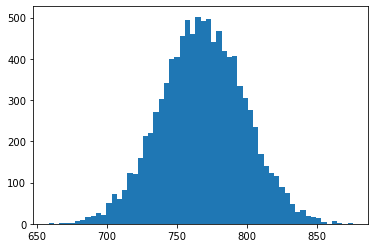

In [4]:
plt.hist(measured,bins='auto')

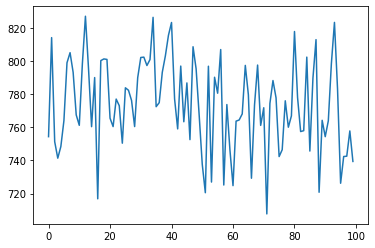

In [52]:
plt.plot(measured[:100])

In [1]:
import altair as alt
import pandas as pd
import numpy as np

x = np.random.normal(size=100)
y = np.random.normal(size=100)

m = np.random.normal(15, 1, size=100)

source = pd.DataFrame({"x": x, "y":y, "m":m})

# interval selection in the scatter plot
pts = alt.selection(type="interval", encodings=["x"])

# left panel: scatter plot
points = alt.Chart().mark_point(filled=True, color="black").encode(
    x='x',
    y='y'
).transform_filter(
    pts
).properties(
    width=300,
    height=300
)

# right panel: histogram
mag = alt.Chart().mark_bar().encode(
    x='mbin:N',
    y="count()",
    color=alt.condition(pts, alt.value("black"), alt.value("lightgray"))
).properties(
    width=300,
    height=300
).add_selection(pts)

# build the chart:
alt.hconcat(
    points,
    mag,
    data=source
).transform_bin(
    "mbin",
    field="m",
    bin=alt.Bin(maxbins=20)
)

alt.HConcatChart(...)

In [55]:
pts

Selection('selector001', SelectionDef({
  encodings: ['x'],
  type: 'interval'
}))

In [2]:
from bs4 import BeautifulSoup
with open("graphbokeh.html") as fp:
    soup = BeautifulSoup(fp, "html.parser")

In [4]:
soup.head

<head>
<meta charset="utf-8"/>
<title>Bokeh Plot</title>
<script crossorigin="anonymous" integrity="sha384-T2yuo9Oe71Cz/I4X9Ac5+gpEa5a8PpJCDlqKYO0CfAuEszu1JrXLl8YugMqYe3sM" src="https://cdn.bokeh.org/bokeh/release/bokeh-2.2.3.min.js" type="text/javascript"></script>
<script crossorigin="anonymous" integrity="sha384-98GDGJ0kOMCUMUePhksaQ/GYgB3+NH9h996V88sh3aOiUNX3N+fLXAtry6xctSZ6" src="https://cdn.bokeh.org/bokeh/release/bokeh-widgets-2.2.3.min.js" type="text/javascript"></script>
<script type="text/javascript">
            Bokeh.set_log_level("info");
        </script>
</head>

In [76]:
soup.head.find_all("script")

[<script crossorigin="anonymous" integrity="sha384-HjagQp6T0/7bxYTAXbLotF1MLAGWmhkY5siA1Gc/pcEgvgRPtMsRn0gQtMwGKiw1" src="https://cdn.bokeh.org/bokeh/release/bokeh-2.3.0.min.js" type="text/javascript"></script>,
 <script crossorigin="anonymous" integrity="sha384-ZEPPTjL+mdyqgIq+/pl9KTwzji8Kow2NnI3zWY8+sFinWP/SYJ80BnfeJsa45iYj" src="https://cdn.bokeh.org/bokeh/release/bokeh-widgets-2.3.0.min.js" type="text/javascript"></script>,
 <script type="text/javascript">
             Bokeh.set_log_level("info");
         </script>]

In [75]:
soup.head

<head>
<meta charset="utf-8"/>
<title>Bokeh Plot</title>
<script crossorigin="anonymous" integrity="sha384-HjagQp6T0/7bxYTAXbLotF1MLAGWmhkY5siA1Gc/pcEgvgRPtMsRn0gQtMwGKiw1" src="https://cdn.bokeh.org/bokeh/release/bokeh-2.3.0.min.js" type="text/javascript"></script>
<script crossorigin="anonymous" integrity="sha384-ZEPPTjL+mdyqgIq+/pl9KTwzji8Kow2NnI3zWY8+sFinWP/SYJ80BnfeJsa45iYj" src="https://cdn.bokeh.org/bokeh/release/bokeh-widgets-2.3.0.min.js" type="text/javascript"></script>
<script type="text/javascript">
            Bokeh.set_log_level("info");
        </script>
</head>

In [84]:
soup.find_all("body")

bs4.element.ResultSet

In [6]:
soup.head.contents[5]
soup.head.contents[7]
soup.head.contents[9]

<script type="text/javascript">
            Bokeh.set_log_level("info");
        </script>

In [16]:
import psutil
psutil.cpu_percent()


7.2